
# Lecture 11: Kernels
Adapted from Applied Machine Learning Lecture Notes of Volodymyr Kuleshov, Cornel Tech

__Instructor Tan Bui__

$\newcommand{\bs}[1]{\boldsymbol{#1}}$

# Part 1: The Kernel Trick: Motivation

So far, the majority of the machine learning models we have seen have been *linear*.

In this lecture, we will see a general way to make many of these models *non-linear*. We willl use a new idea called *kernels*.

# Review: Linear Regression

Recall that a linear model has the form
$$ f(\bs{x}) = \sum_{j=0}^d {\bs{\theta}}_j \cdot {x}_j = \bs{\theta}^\top \bs{x}. $$
where $\bs{x}$ is a vector of features and we used the notation ${x}_0 = 1$.

We pick $\bs{\theta}$ to minimize the (L2-regularized) mean squared error (MSE):
$$J(\bs{\theta})= \frac{1}{2n} \sum_{i=1}^n(y^{(i)} - \bs{\theta}^\top \bs{x}^{(i)})^2 + \frac{\lambda}{2}\sum_{j=1}^d {\theta}_j^2$$

# Review: Polynomials

Recall that a polynomial of degree $p$ is a function of the form
$$
a_p x^p + a_{p-1} x^{p-1} + ... + a_{1} x + a_0.
$$

Below are some examples of polynomial functions.

# Review: Polynomial Regression

Specifically, given a one-dimensional continuous variable $x$, we can defining a feature function $\bs{\phi} : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \bs{\phi}(\bs{x}) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

The class of models of the form
$$ f_\theta(\bs{x}) :=  \bs{\theta}^\top \bs{\phi}(\bs{x}) $$
with parameters $\bs{\theta}$ and polynomial features $\bs{\phi}$ is the set of $p$-degree polynomials.

# Towards General Non-Linear Features

Any non-linear feature map $\bs{\phi}(\bs{x}) : \mathbb{R}^d \to \mathbb{R}^p$ can be used to obtain general models of the form
$$ f_\theta(\bs{x}) := \bs{\theta}^\top \bs{\phi}(\bs{x}) $$
that are highly non-linear in $\bs{x}$ but linear in $\bs{\theta}$.

# The Featurized Design Matrix

It is useful to represent the featurized dataset as a matrix $\Phi \in \mathbb{R}^{n \times p}$:

$$ \Phi = \begin{bmatrix}
\bs{\phi}(\bs{x}^{(1)})_1 & \bs{\phi}(\bs{x}^{(1)})_2 & \ldots & \bs{\phi}(\bs{x}^{(1)})_p \\
\bs{\phi}(\bs{x}^{(2)})_1 & \bs{\phi}(\bs{x}^{(2)})_2 & \ldots & \bs{\phi}(\bs{x}^{(2)})_p \\
\vdots \\
\bs{\phi}(\bs{x}^{(n)})_1 & \bs{\phi}(\bs{x}^{(n)})_2 & \ldots & \bs{\phi}(\bs{x}^{(n)})_p
\end{bmatrix}
=
\begin{bmatrix}
- & \bs{\phi}(\bs{x}^{(1)})^\top & - \\
- & \bs{\phi}(\bs{x}^{(2)})^\top & - \\
& \vdots & \\
- & \bs{\phi}(\bs{x}^{(n)})^\top & - \\
\end{bmatrix}
.$$

# Featurized Normal Equations

The normal equations provide a closed-form solution for $\bs{\theta}$:
$$ \bs{\theta} = ({X}^\top {X}  + \lambda \bs{I})^{-1} {X}^\top \bs{y}.$$

When the vectors of attributes $\bs{x}^{(i)}$ are featurized, we can write this as
$$ \bs{\theta} = (\Phi^\top \Phi + \lambda \bs{I})^{-1} {\Phi}^\top \bs{y}.$$

# Push-Through Matrix Identity

We can modify this expression by using a version of the [push-through matrix identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Discussion):
$$ (\lambda I + U V)^{-1} U = U (\lambda I + V U)^{-1} $$
where $U \in \mathbb{R}^{n \times m}$ and $V \in \mathbb{R}^{m \times n}$ and $\lambda \neq 0$

Proof sketch: Start with $U (\lambda I + V U) = (\lambda I + U V) U$ and multiply both sides by $(\lambda I + V U)^{-1}$ on the right and $(\lambda I + U V)^{-1}$ on the left.


# Normal Equations: Dual Form

We can apply the identity $(\lambda I + U V)^{-1} U = U (\lambda I + V U)^{-1}$ to the normal equations with $U=\Phi^\top$ and $V=\Phi$.

$$ \bs{\theta} = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top \bs{y}$$

to obtain the *dual* form:

$$ \bs{\theta} = \Phi^\top (\Phi \Phi^\top + \lambda I)^{-1} \bs{y}.$$

The first approach takes $O(p^3)$ time; the second is $O(n^3)$ and is faster when $p > n$.

# Feature Representations for Parameter $\theta$

An interesting corollary of the dual form
$$ \bs{\theta} = \Phi^\top \underbrace{(\Phi \Phi^\top + \lambda I)^{-1} \bs{y}}_\alpha$$
is that the optimal $\bs{\theta}$ is a linear combination of the $n$ training set features:
$$ \bs{\theta} = \sum_{i=1}^n \alpha_i \phi(\bs{x}^{(i)}). $$

Here, the weights $\alpha_i$ are derived from $(\Phi \Phi^\top + \lambda I)^{-1} \bs{y}$ and equal
$$\alpha_i = \sum_{j=1}^n L_{ij} \bs{y}_j$$
where $L = (\Phi \Phi^\top + \lambda I)^{-1}.$

# Predictions From Features

Consider now a prediction $\bs{\phi}(\bs{x'})^\top \bs{\theta}$ at a new input $\bs{x'}$:
$$\bs{\phi}(\bs{x'})^\top \bs{\theta} = \sum_{i=1}^n \alpha_i \ \bs{\phi}(\bs{x'})^\top \bs{\phi}(\bs{x}^{(i)}).$$

The **crucial observation** is that the features $\phi(x)$ are never used directly in this equation. **Only their dot product is used!**

This observation will be at the heart of a powerful new idea called *the kernel trick*.

# Learning From Feature Products

**We also don't need features $\phi$ for learning $\theta$**, just their dot product! 
First, recall that each row $i$ of $\Phi$ is the $i$-th featurized input $\phi(x^{(i)})^\top$.

Thus $K = \Phi \Phi^\top$ is a matrix of all dot products between all the $\bs{\phi}(\bs{x}^{(i)})$
$$K_{ij} = \bs{\phi}(\bs{x}^{(i)})^\top \bs{\phi}(\bs{x}^{(j)}).$$

We can compute $\alpha = (K+\lambda I)^{-1}y$ and use it for predictions
$$\bs{\phi}(\bs{x'})^\top \bs{\theta} = \sum_{i=1}^n \alpha_i \bs{\phi}(\bs{x'})^\top \bs{\phi}(\bs{x}^{(i)}).$$
and all this only requires dot products, not features $\phi$! **But this sounds strange as how could we compute the inner product between feature vectors without knowing the feature map $\phi$?**

***So far so good except the following two problems:***
1. How do we construction the feature map in the first place? 
2. We have to compute inner products in the feature space and it could be much more expensive if the feature space is higher dimension (most of the cases). So what is the point?

# The Kernel Trick to Bypass $\phi^T(x)\phi(z)$

The above observations hint at a powerful new idea -- if we can compute dot products of features $\phi(x)$ efficiently, then we will be able to use high-dimensional features easily.

It turns our that we can do this for many ML algorithms -- we call this the Kernel Trick.


# Part 2: From feature map to Kernel: An Example

Many ML algorithms can be written down as optimization problems in which the features $\bs{\phi}(\bs{x})$ only appear as dot products $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z})$ that can be computed efficiently via a kernel without the need of knowing $\bs{\phi}$.

# Polynomial features I

Can we compute the dot product $\bs{\phi}(\bs{x})^\top \bs{\phi}(x')$ of polynomial features $\bs{\phi}(\bs{x})$ more efficiently than using the standard definition of a dot product? Let's look at an example.

To start, consider polynomial features $\bs{\phi} : \mathbb{R}^d \to \mathbb{R}^{d^2}$ of the form

$$ \bs{\phi}(\bs{x})_{ij} = x_i x_j \;\text{ for $i,j \in \{1,2,\ldots,d\}$}. $$ 


For $d=3$ this looks like
$$ \small \bs{\phi}(\bs{x}) = \begin{bmatrix}
x_1 x_1 \\
x_1 x_2 \\
x_1 x_3 \\
x_2 x_1 \\
x_2 x_1 \\
x_2 x_2 \\
x_3 x_3 \\
x_3 x_1 \\
x_3 x_2 \\
x_3 x_3 \\
\end{bmatrix}.
$$


The product of $x$ and $z$ in feature space equals:
$$ \bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z}) = \sum_{i=1}^d \sum_{j=1}^d x_i x_j z_i z_j $$
Computing this dot product invovles the sum over $d^2$ terms and takes $O(d^2)$ time. 


An altenative way of computing the dot product $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z})$ is to instead compute $(\bs{x}^\top \bs{z})^2$. One can check that this has the same result:
\begin{align*}
(\bs{x}^\top \bs{z})^2 & = (\sum_{i=1}^d x_i z_i)^2 \\
& = (\sum_{i=1}^d x_i z_i) \cdot (\sum_{j=1}^d x_j z_j) \\
& = \sum_{i=1}^d \sum_{j=1}^d x_i z_i x_j z_j \\
& = \bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z})
\end{align*}

However, computing $(\bs{x}^\top \bs{z})^2$ can be done in only $O(d)$ time!

This is a very powerful idea:
* We can compute the dot product between $O(d^2)$ features in only $O(d)$ time.
* We can use high-dimensional features within ML algorithms that only rely on dot products (like kernelized ridge regression) without incurring extra costs.
* **We don't even need to know how to calculate, and hence knowning, $\bs{\phi}(\bs{z})$ as we know $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z}) = (\bs{x}^\top \bs{z})^2$. Turning the argument around: if we define the inner product in the feature space as $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z}) := (\bs{x}^\top \bs{z})^2$, then we do not need to know the feature map $\bs{\phi}$ in all of our calculations as all we need are the inner products, which are given by $\bs{x}^\top \bs{z}$**.

# Polynomial Features II

The number of polynomial features $\bs{\phi}_p$ of degree $p$ when $x \in \mathbb{R}^d$ 

$$ \bs{\phi}_p(\bs{x})_{i_1, i_2, \ldots, i_p} = x_{i_1} x_{i_2} \cdots x_{i_p} \;\text{ for $i_1, i_2,  \ldots, i_p \in \{1,2,\ldots,d\}$} $$

scales as $O(d^p)$. 


*However, we can compute the dot product $\bs{\phi}_p(\bs{x})^\top \bs{\phi}_p(\bs{z})$ in this feature space in only $O(d)$ time for any $p$ as:
$$\bs{\phi}_p(\bs{x})^\top \bs{\phi}_p(\bs{z}) = (\bs{x}^\top \bs{z})^p.$$

* As we will see below, the right hand side is a kernel and we have constructed kernel from feature transformation. The key to efficiency is the bypass the feature map and go directly with kernel, and **this is known as the kernel trick**. We will see this below.

# Algorithm: Kernelized Polynomial Ridge Regression

* __Type__: Supervised learning (Regression)
* __Model family__: Polynomials.
* __Objective function__: $L2$-regularized ridge regression.
* __Optimizer__: Normal equations (dual form).
* __Probabilistic interpretation__: No simple interpretation!

# The Kernel Trick: General Idea

Many types of features $\bs{\phi}(\bs{x})$ have the property that their dot product $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z})$ can be computed more efficiently than if we had to form these features explicitly.

Also, we will see that many algorithms in machine learning can be written down as optimization problems in which the features $\bs{\phi}(\bs{x})$ only appear as dot products $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z})$.

***
The problem with the above approach are the following:
1. We have to come up with a feature map
2. We then have to map all the data points to the feature space, which is high dimensions.

***Luckily, with the kernel trick that we discuss next, we can step over these two problems altogether.***
***

The ***Kernel Trick*** means that we can use complex non-linear features, without knowing them, within  these algorithms with little additional computational cost.

Examples of algorithms in which we can use the Kernel trick:
* Supervised learning algorithms: linear regression, logistic regression, support vector machines, etc.
* Unsupervised learning algorithms: PCA, density estimation.

We will look at more examples shortly.


# Part 3: The Kernel Trick in SVMs

Many ML algorithms can be written down as optimization problems in which the features $\phi(x)$ only appear as dot products $\phi(x)^\top \phi(z)$ that can be computed efficiently.

We will now see how SVMs can benefit from the Kernel Trick as well.

# Review: Binary Classification

Consider a training dataset $\mathcal{D} = \{(\bs{x}^{(1)}, {y}^{(1)}), (\bs{x}^{(2)}, {y}^{(2)}), \ldots, (\bs{x}^{(n)}, {y}^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Binary Classification__: The target variable $y$ is discrete and takes on one of $K=2$ possible values.

In this lecture, we assume $\mathcal{Y} = \{-1, +1\}$.

# SVM in feature space

We will consider models of the form

\begin{align*}
f_\theta(\bs{x}) = \bs{\theta}^\top \bs{\phi}(\bs{x}) + \theta_0
\end{align*}

where $\bs{x}$ is the input and $y \in \{-1, 1\}$ is the target.

# Primal and Dual Formulations in the feature space

Recall that the the max-margin hyperplane can be formualted as the solution to the following *primal* optimization problem.
\begin{align*}
\min_{\bs{\theta},\theta_0, \xi}\; & \frac{1}{2}||\bs{\theta}||^2 + C \sum_{i=1}^n \xi_i \;  \\
\text{subject to } \; & {y}^{(i)}(\bs{\theta}^\top \bs{\phi}(\bs{x}^{(i)})+\theta_0)\geq 1 - \xi_i \; \text{for all $i$} \\
& \xi_i \geq 0
\end{align*}

The solution to this problem also happens to be given by the following *dual* problem:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k {y}^{(i)} {y}^{(k)} \bs{\phi}(\bs{x}^{(i)})^\top \bs{\phi}(\bs{x}^{(k)})  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i {y}^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

# Primal Solution

We can obtain a primal solution from the dual via the following equation:
$$
\bs{\theta}^* = \sum_{i=1}^n \lambda_i^* {y}^{(i)} \bs{\phi}(\bs{x}^{(i)}).
$$

The score at a new point $x'$ will equal
$$
\bs{\theta}^\top \bs{\phi}(x') + \theta_0= \sum_{i=1}^n \lambda_i^* {y}^{(i)} \bs{\phi}(\bs{x}^{(i)})^\top \bs{\phi}(x') + \theta_0.
$$

# Construct kernel from feature map

More generally, given features $\bs{\phi}(\bs{x})$, suppose that we have a function $K : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ that outputs dot products between vectors in $\mathcal{X}$

$$ K(\bs{x}, \bs{z}) = \bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z}). $$

We will call $K$ the  *kernel* function.

Recall that an example of a useful kernel function is
$$K(\bs{x},\bs{z}) = (\bs{x} \cdot \bs{z})^p$$
because it computes the dot product of polynomial features of degree $p$.

Then notice that we can rewrite the dual of the SVM in the feature space as
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k {y}^{(i)} {y}^{(k)} K(\bs{x}^{(i)}, \bs{x}^{(k)})  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i {y}^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}
and predictions at a new point $x'$ are given by 
\begin{align*}
\bs{\theta}^\top \bs{\phi}(\bs{x'}) + \theta_0 = \sum_{i=1}^n \lambda_i^* {y}^{(i)} K(\bs{x}^{(i)}, \bs{x'}) + \theta_0.
\end{align*}

**This shows that the whole computation depends ONLY on the kernel, NOT the feature map. Consequently, we can perform SVM in the feature space without actually going there and the cost is pretty the same as the SVM in the original space as all we need is to evaluate the kernels at all pairs (we need pairwise inner product in the original space anyway).**

# Algorithm: Kernelized Support Vector Machine Classification (Dual Form)

* __Type__: Supervised learning (binary classification)
* __Model family__: Non-linear decision boundaries.
* __Objective function__: Dual of SVM optimization problem.
* __Optimizer__: Sequential minimial optimization.
* __Probabilistic interpretation__: No simple interpretation!


# Part 4: Types of Kernels

Now that we saw the kernel trick, let's look at several examples of kernels.

# Definition: Kernels

The *kernel* corresponding to features $\phi(x)$ is a function $K : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ that outputs dot products between vectors in $\mathcal{X}$
$$ K(\bs{x}, \bs{z}) = \bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{z}). $$

We will also consider general functions $K : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ and call these *kernel functions*.

***Kernels have various intepretations***:
* The dot product or geometrical angle between $\bs{x}$ and $\bs{z}$
* A notion of similarity between $\bs{x}$ and $\bs{z}$

In order to illustrate kernels, we will use this dataset.

(-3.0, 3.0)

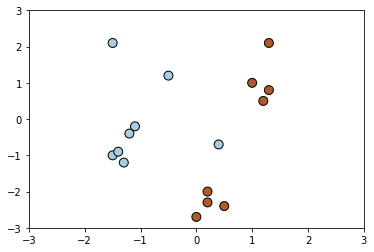

In [1]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Our dataset and targets
X = np.c_[(.4, -.7), (-1.5, -1), (-1.4, -.9), (-1.3, -1.2), (-1.1, -.2), (-1.2, -.4), (-.5, 1.2), (-1.5, 2.1), (1, 1),
          (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), (.2, -2.3), (0, -2.7), (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

x_min, x_max = -3, 3
y_min, y_max = -3, 3
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k', s=80)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Example: Linear Kernel

The simplest kind of kernel that exists is called the linear kernel.
This simply corresponds to dot product multiplication of the features:
$$K(\bs{x},\bs{z}) = \bs{x}^\top \bs{z}$$

Applied to an SVM, this corresponds to a linear decision boundary.

Below is an example of how we can use the SVM implementation in `sklearn` with a linear kernel.

Internally, this solves the dual SVM optimization problem in the feature space ***without going there*** (thanks to the kernel trick).

/workspace/HaiNguyen/Source/skitlearn/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


(-3.0, 3.0)

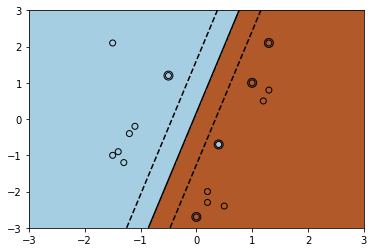

In [2]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='linear', gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Example: Polynomial Kernel

A more interesting example is the polynomial kernel of degree $p$, of which we have already seen a simple example:
$$K(\bs{x},\bs{z}) = (\bs{x}^\top \bs{z} + c)^p.$$

This corresponds to a mapping to a feature space of dimension $d+p \choose p$ that has all monomials $x_{i_1}x_{i_2}\cdots x_{i_p}$ of degree at most $p$.

For $d=3$ this feature map looks like
$$ \small \bs{\phi}(\bs{x}) = \begin{bmatrix}
x_1 x_1 \\
x_1 x_2 \\
x_1 x_3 \\
x_2 x_1 \\
x_2 x_1 \\
x_2 x_2 \\
x_3 x_3 \\
x_3 x_1 \\
x_3 x_2 \\
x_3 x_3 \\
\sqrt{2}c x_1 \\
\sqrt{2}c x_2 \\
\sqrt{2}c x_3 \\
c
\end{bmatrix}.
$$

The polynomial kernel allows us to compute dot products in a $O(d^p)$-dimensional space in time $O(d)$.

Let's see how it would be implemented in `sklearn`.

/workspace/HaiNguyen/Source/skitlearn/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


(-3.0, 3.0)

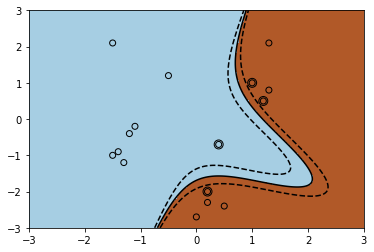

In [3]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='poly', degree=3, gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Example: Radial Basis Function Kernel

Another example is the Radial Basis Function (RBF; sometimes called Gaussian) kernel
$$K(\bs{x},\bs{z}) = \exp \left(-\frac{||\bs{x} - \bs{z}||^2}{2\sigma^2}\right),$$
where $\sigma$ is a hyper-parameter. It's easiest to understand this kernel by viewing it as a similarity measure.

We can show that this kernel corresponds to an *infinite-dimensional* feature map and the limit of the polynomial kernel as $p \to \infty$. 

To see why that's intuitively the case, consider the Taylor expansion

$$
\exp \left(-\frac{||\bs{x} - \bs{z}||^2}{2\sigma^2}\right) \approx 1 - \frac{||\bs{x} - \bs{z}||^2}{2\sigma^2} + \frac{||\bs{x} - \bs{z}||^4}{2! \cdot 4\sigma^4} - \frac{||\bs{x} - \bs{z}||^6}{3! \cdot 8\sigma^6} + \ldots
$$


Each term on the right hand side can be expanded into a polynomial.

We can look at the `sklearn` implementation again.

/workspace/HaiNguyen/Source/skitlearn/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


(-3.0, 3.0)

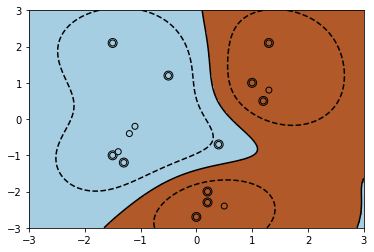

In [4]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='rbf', gamma=.5)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Conditions for $K$ to be a Kernel?

We've seen that for many features $\bs{\phi}$ we can define a kernel function $K : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ that efficiently computes $\bs{\phi}(\bs{x})^\top \bs{\phi}(\bs{x})$.

Suppose now that we use some kernel function $K : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ in an ML algorithm. Is there an implicit feature mapping $\bs{\phi}$ that corresponds to using K?

Let's start by ***finding a necessary condition*** for $K : \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ to be associated with a feature map.

Suppose that $K$ is a kernel for some feature map $\bs{\phi}$, and consider an arbitrary set of $n$ points $\{\bs{x}^{(1)}, \bs{x}^{(2)}, \ldots, \bs{x}^{(n)}\}$.

Consider the matrix $L \in \mathbb{R}^{n\times n}$ defined as $L_{ij} = K(\bs{x}^{(i)}, \bs{x}^{(j)}) = \bs{\phi}(\bs{x}^{(i)})^\top \bs{\phi}(\bs{x}^{(j)})$. We claim that $L$ must be symmetric and positive semi-definite.


Indeed, it $L$ is symmetric because the dot product $\bs{\phi}(\bs{x}^{(i)})^\top \bs{\phi}(\bs{x}^{(j)})$ is symmetric. Moreover, for any $z$,

\begin{align*}
\bs{z}^\top L \bs{z}
& = \sum_{i=1}^n \sum_{j=1}^n z_i L_{ij} z_j 
 = \sum_{i=1}^n \sum_{j=1}^n z_i \bs{\phi}(\bs{x}^{(i)})^\top \bs{\phi}(\bs{x}^{(j)}) z_j \\
& = \sum_{i=1}^n \sum_{j=1}^n z_i (\sum_{k=1}^n \bs{\phi}(\bs{x}^{(i)})_k \bs{\phi}(\bs{x}^{(j)})_k ) z_j \\
& = \sum_{k=1}^n \sum_{i=1}^n \sum_{j=1}^n z_i \bs{\phi}(\bs{x}^{(i)})_k \bs{\phi}(\bs{x}^{(j)})_k z_j \\
& = \sum_{k=1}^n  \left( \sum_{i=1}^nz_i \bs{\phi}(\bs{x}^{(i)})_k \right)^2 \geq 0
\end{align*}

**Thus if $K$ is a kernel, $L$ is necessary positive semidefinite for any $n$ points $x^{(i)}$**. ***It turns out that this is also a sufficient condition for a Mercer kernel.***

# Mercer's Theorem (A simplified version)

If $K$ is a kernel, $L$ is necessary positive semi-definite for any set of $n$ points $\bs{x}^{(i)}$. It turns out that it is is also a sufficent condition.

__Definition (Mercer Kernel).__ $K(\bs{x}, \bs{y})$ is a Mercer kernel if:
1. $K(\bs{x},\bs{y}) = K(\bs{y},\bs{x})$
2. For any set $\{\bs{x}^{(1)}, \bs{x}^{(2)}, \ldots, \bs{x}^{(n)}\}$ of size $n \geq 1$, the matrix $L$ defined as $L_{ij} = K(\bs{x}^{(i)}, \bs{x}^{(j)})$ is symmetric and positive semi-definite

***This resembles the definition of an inner product, and this should not be a surprise as it is our desire that $K(\bs{x},\bs{y})$ is an inner product in the feature space, i.e. $K(\bs{x},\bs{y}) = \bs{\phi}^T(\bs{x})\bs{\phi}(\bs{y})$.***

__Theorem.__ (Mercer) Let $K: \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ be a kernel function. There exists a mapping $\bs{\phi}$ associated with $K$ if and only if for any $n$ and any dataset $\{\bs{x}^{(1)}, \bs{x}^{(2)}, \ldots, \bs{x}^{(n)}\}$ of size $n \geq 1$, the matrix $L$ defined as $L_{ij} = K(\bs{x}^{(i)}, \bs{x}^{(j)})$ is symmetric and positive semi-definite.

***Thus, for any Mercer kernel, there is an associated feature map. The important point in the kernel approach is that we do not need to know how the feature map looks like, and yet can still solve the problem in the feature space.***

# Pros and Cons of Kernels

Are kernels a free lunch? Not quite.
* Kernels allow us to use features $\bs{\phi}$ of very large dimension $d$.

*  However computation is at least $O(n^2)$, where $n$ is the dataset size. We need to compute distances $K(\bs{x}^{(i)}, \bs{x}^{(j)})$, for all $i,j$.

* Approximate solutions can be found more quickly, but in practice kernel methods are not used with today's massive datasets.

* However, on small and medium-sized data, kernel methods will be at least as good as **neural nets** and probably much easier to train.

# Summary: Kernels

* A kernel is a function $K: \mathcal{X} \times \mathcal{X} \to [0,\infty]$ that defines a notion of similarity over pairs of vectors in $\mathcal{X}$.

* Kernels are often associated with high-dimensional features $\bs{\phi}$ and implicitly map inputs to this feature space.

* Kernels can be incorporated into many machine learning algorithms, which enables them to learn highly nonlinear models.

Examples of algorithms in which we can use kernels include:
* ***Supervised learning algorithms***: linear regression, logistic regression, support vector machines, etc.
* ***Unsupervised learning algorithms***: PCA, density estimation.

Kernels are very powerful because they can be used throughout machine learning. 